In [8]:
import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting


In [10]:
df = pd.read_csv("biomaterial_dataset.csv")  # Load your dataset


In [12]:
df.head()


,Material_ID,Composition,Porosity,Mechanical_Strength,Degradation_Rate,Biocompatibility_Score,Tissue_Type,Cell_Adhesion,Elastic_Modulus,Synthesis_Method
0,1,"Polycaprolactone (70%), Hydroxyapatite (30%)",30,45,2.5,8.5,Bone,85,2.3,Electrospinning
1,2,"Polylactic Acid (80%), Tricalcium Phosphate (20%)",25,50,1.8,9.0,Bone,90,2.5,3D Printing
2,3,"Collagen (60%), Chitosan (40%)",40,20,3.0,7.5,Cartilage,75,1.2,Freeze Drying
3,4,"Polyethylene Glycol (50%), Gelatin (50%)",35,15,4.0,7.0,Skin,70,0.8,Electrospinning
4,5,"Silk Fibroin (90%), Graphene Oxide (10%)",20,60,1.5,9.5,Bone,95,3.0,3D Printing


In [15]:
df.isnull().sum()


Material_ID               0
Composition               0
Porosity                  0
Mechanical_Strength       0
Degradation_Rate          0
Biocompatibility_Score    0
Tissue_Type               0
Cell_Adhesion             0
Elastic_Modulus           0
Synthesis_Method          0
dtype: int64

In [17]:
df.describe()


,Material_ID,Porosity,Mechanical_Strength,Degradation_Rate,Biocompatibility_Score,Cell_Adhesion,Elastic_Modulus
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,5.50000,31.30000,35.800000,2.600000,8.130000,81.30000,1.810000
std,3.02765,7.58727,16.355767,0.840635,0.873117,8.73117,0.769488
min,1.00000,20.00000,15.000000,1.500000,7.000000,70.00000,0.800000
25%,3.25000,25.75000,21.250000,1.850000,7.525000,75.25000,1.225000
50%,5.50000,31.50000,35.000000,2.650000,7.900000,79.00000,1.650000
75%,7.75000,37.25000,48.750000,3.150000,8.875000,88.75000,2.450000
max,10.00000,42.00000,60.000000,4.000000,9.500000,95.00000,3.000000


In [19]:
df = df.dropna()  # Remove missing values


In [21]:
df = pd.get_dummies(df, drop_first=True)  # Convert categorical columns


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [29]:
from sklearn.model_selection import train_test_split

# Assume last column is the target variable (modify as needed)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column (target)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.2945941518185898


In [37]:
print(f"X_train shape: {X_train.shape}")
print(f"Expected features: {X_train.shape[1]}")
print(f"Provided features: {new_material.shape[1]}")


X_train shape: (8, 19)
Expected features: 19
Provided features: 4


In [39]:
# Check the number of features in X_train
num_features = X_train.shape[1]

# Example new material - Adjust based on your dataset
new_material = np.random.rand(1, num_features)  # Generates random numbers with correct feature count

# Predict
predicted_property = model.predict(new_material)
print(f"Predicted Material Property: {predicted_property[0]}")


Predicted Material Property: 0.5019011475427824


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
# Convert new_material into a DataFrame with same column names as X_train
import pandas as pd

# Create a DataFrame with correct feature names
new_material_df = pd.DataFrame(new_material, columns=X_train.columns)

# Predict
predicted_property = model.predict(new_material_df)
print(f"Predicted Material Property: {predicted_property[0]}")


Predicted Material Property: 0.5019011475427824


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better performance


Model Evaluation:
Mean Absolute Error (MAE): 0.2946
Mean Squared Error (MSE): 0.0879
R² Score: 0.0000


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain the model
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define model and parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/pyt

Best Parameters: {'max_depth': None, 'n_estimators': 50}


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


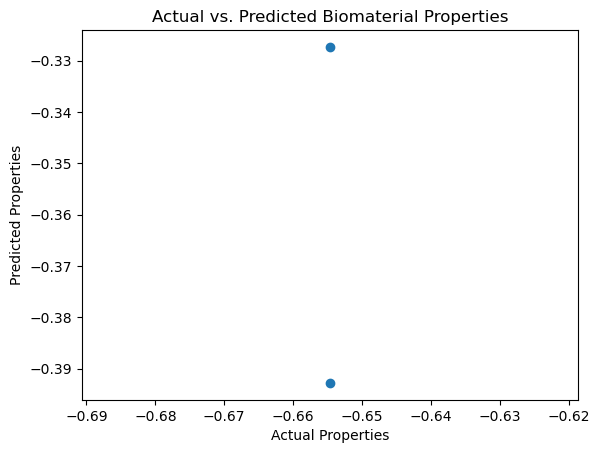

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Properties")
plt.ylabel("Predicted Properties")
plt.title("Actual vs. Predicted Biomaterial Properties")
plt.show()
